<h2>911 Call Data Analysis</h2>
<p>Exploratory Data Analysis on Kaggle data set. Emergency 911 Calls from Montomgery County, PA</p>
<p>https://www.kaggle.com/mchirico/montcoalert</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<h3>Top 5 zipcodes for 911 calls</h3>

In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<h3>Top 5 townships for 911 calls</h3>

In [5]:
df['twp'].value_counts()[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<h3>Unique emergency call types</h3>

In [6]:
df['title'].nunique()

110

<h3>Creating new features from the data</h3>
<p>There are 3 distinct departments that get dispatched for a 911 call. EMS, Fire, and Traffic</p>
<p>Who is dispatched the most?</p>

In [7]:
def getDepartment(call):
    return call.split(':')[0]

In [8]:
df['Department'] = df['title'].apply(lambda call : getDepartment(call))

In [9]:
df['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


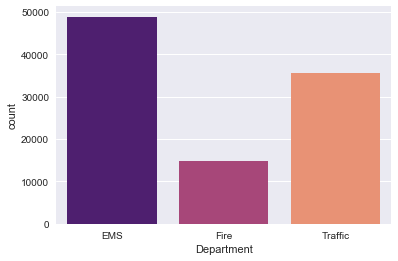

In [10]:
sns.countplot(x='Department', data=df, palette="magma")

<h2>Programmically analyze time information</h2>

In [11]:
# Data type of timeStamp
type(df['timeStamp'].iloc[0])

str

In [12]:
# Convert the time stamp string to a DateTime object
df['timeStamp'] = df['timeStamp'].apply(lambda time: pd.to_datetime(time))

In [13]:
# Create 3 new columns for Hour, Month, Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [14]:
# The DateTime Day of Week is a 0-6 integer, use map() method to put them as text.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


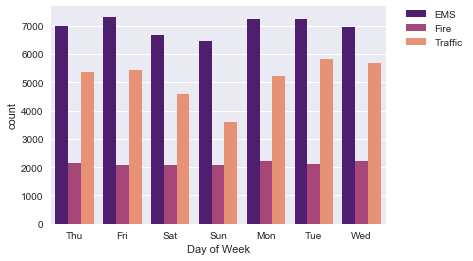

In [15]:
# Plot the Day of Week
sns.countplot(x='Day of Week', data=df, hue='Department', palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


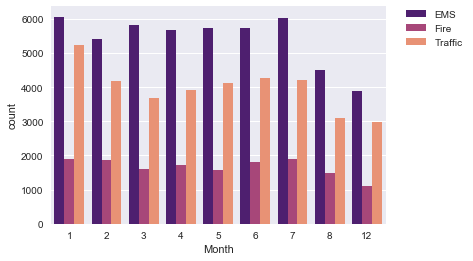

In [16]:
# Month Data
sns.countplot(x='Month', data=df, hue='Department', palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


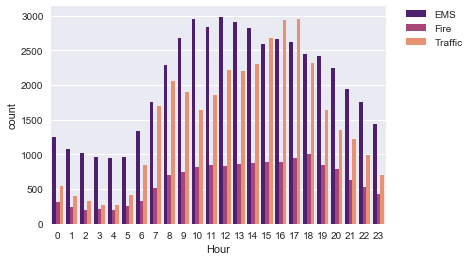

In [17]:
#Hour
sns.countplot(x='Hour', data=df, hue='Department', palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<h3>Notice...</h3>
<p>Some of the month data is missing. We do not have data for Aug, Sept and Nov.</p>
<p>Plot the existing data as a line graph the extrapolate the best fit for those missing months</p>

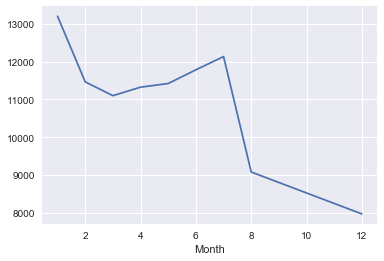

In [18]:
byMonth = df.groupby('Month').count()
byMonth['lat'].plot()

<h2>Draw a linear regression line on the data set</h2>

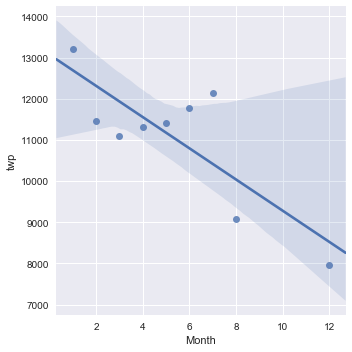

In [19]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

<h3>Aggregate the Date info and plot it across the 3 services dispatched</h3>

In [22]:
#Create a new column called Date
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

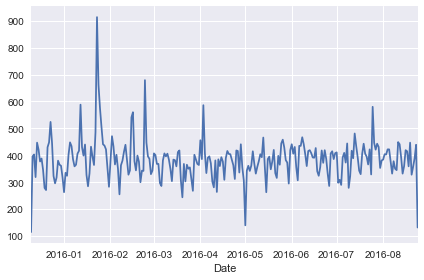

In [23]:
#Group the dataframe by date and count the aggreate. Can use any variable since all the count numbers are the same.
byDate = df.groupby('Date').count()
byDate['lat'].plot(xlim=['2015-12-10', '2016-08-24'])
plt.tight_layout()

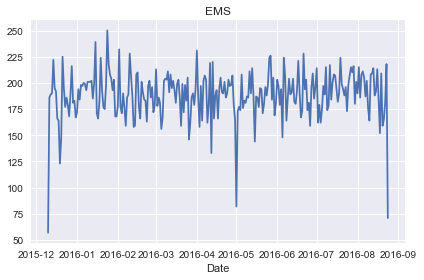

In [26]:
df[df['Department'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

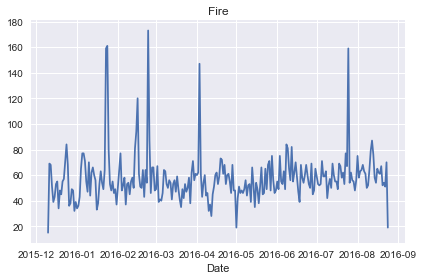

In [27]:
df[df['Department'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

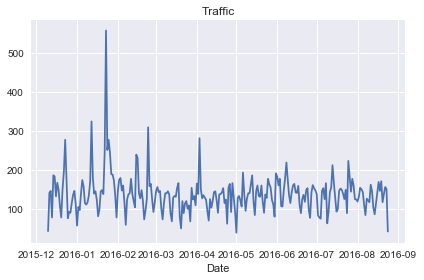

In [28]:
df[df['Department'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [40]:
# Grouping everything by Day of Week and Hour then counting the calls gives a break down of the calls
# during the week. Pull out the any of the columns to act as a counter. Can then use this to create a nice heat map of calls.
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Department']
#The resulting type(dayHour) is a panda series. Unstack it so it goes back to a DataFrame
dayHour = dayHour.unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [41]:
#Plot it has a heatmap

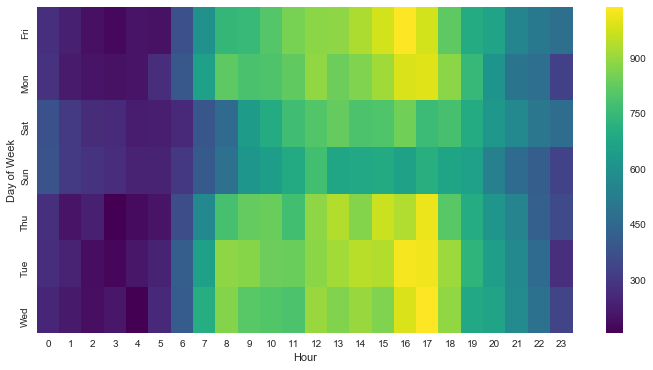

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

<p>** Interesting to see the band across the working day when calls at peaking with only a slight dip during the weekend **<p>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


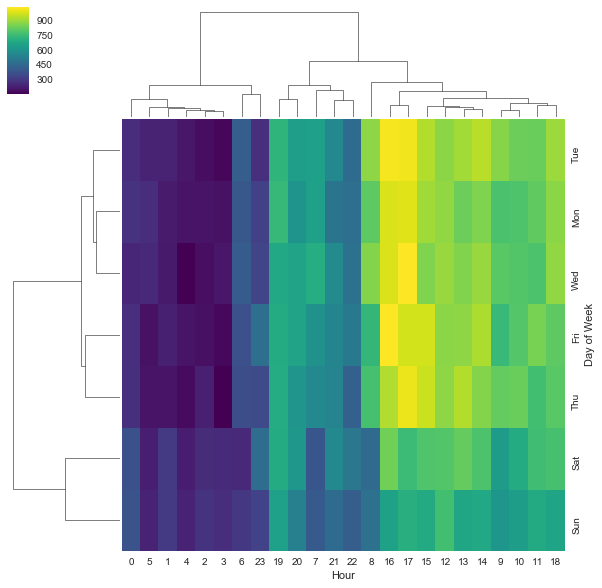

In [43]:
# Can use a cluster heatmap to collect similar values. 
sns.clustermap(dayHour,cmap='viridis')

In [211]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Department'].unstack()

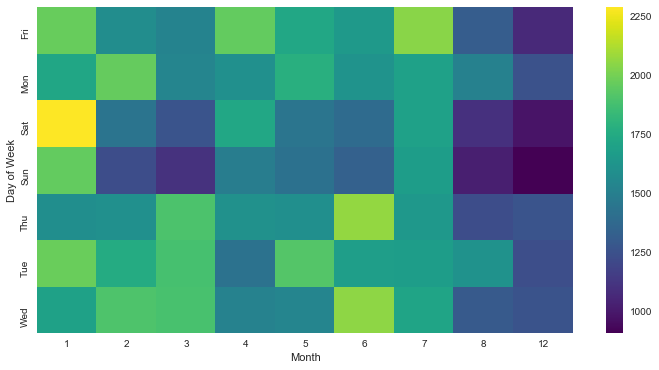

In [214]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


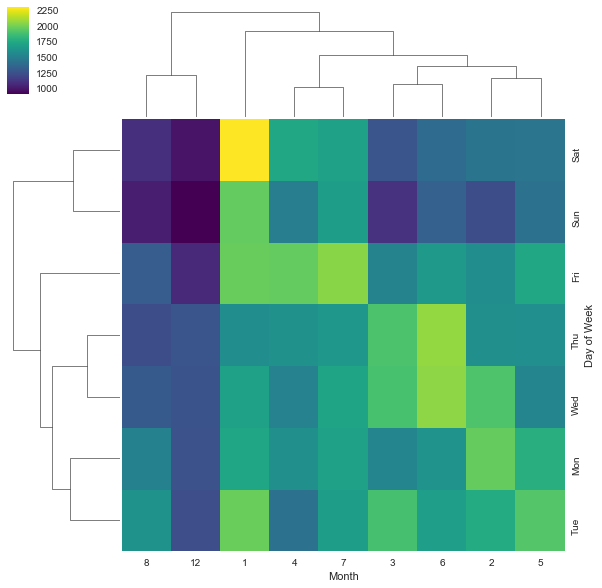

In [215]:
sns.clustermap(dayMonth,cmap='viridis')